# Loading the required Libraries

In [58]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import cv2

# EDA of Single File

In [59]:
file_number = "00"

input_folder = Path.cwd().parent / "data" / "input"
input_file = input_folder / f"input{file_number}.jpg"

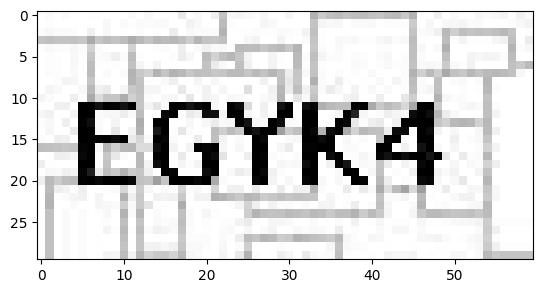

In [60]:
# Load and display the image
img = cv2.imread(str(input_file))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img)
plt.show()

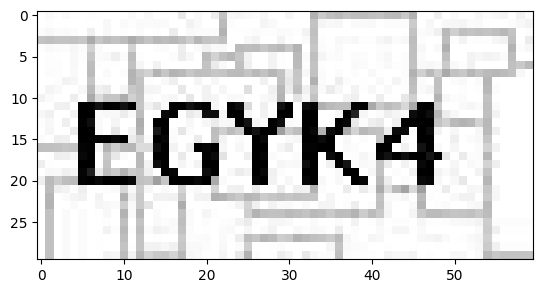

In [61]:
# Convert to grayscale and display
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.figure()
plt.imshow(gray_img, cmap='gray')
plt.show()

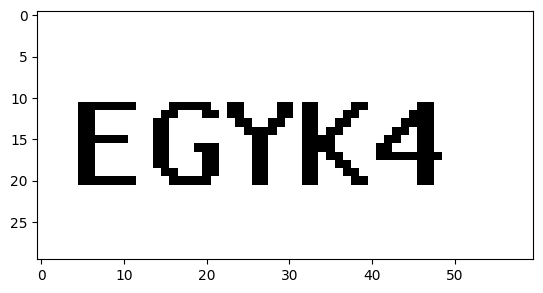

In [62]:
# Threshold to binary for black and white and display
_, bw_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
bw_img = (bw_img > 127).astype(int)

plt.figure()
plt.imshow(bw_img, cmap='gray')
plt.show()

In [63]:
# Analyze columns to find consecutive sequences of zeros in the columns
min_col = np.min(bw_img, axis=0)

col_pairs = []
start_index = None

for i in range(len(min_col)):
    if min_col[i] == 0 and start_index is None:
        start_index = i
    elif min_col[i] != 0 and start_index is not None:
        col_pairs.append((start_index, i - 1))
        start_index = None

# Check if the last element was part of a consecutive sequence
if start_index is not None:
    col_pairs.append((start_index, len(min_col) - 1))

col_pairs

[(5, 11), (14, 21), (23, 30), (32, 39), (41, 48)]

In [64]:
# Analyze rows to find consecutive sequences of zeros in the rows
min_row = np.min(bw_img, axis=1)

row_pairs = []
start_index = None

for i in range(len(min_row)):
    if min_row[i] == 0 and start_index is None:
        start_index = i
    elif min_row[i] != 0 and start_index is not None:
        row_pairs.append((start_index, i - 1))
        start_index = None

# Check if the last element was part of a consecutive sequence
if start_index is not None:
    row_pairs.append((start_index, len(min_row) - 1))

row_pairs

[(11, 20)]

Pixel Shape: (10, 8)


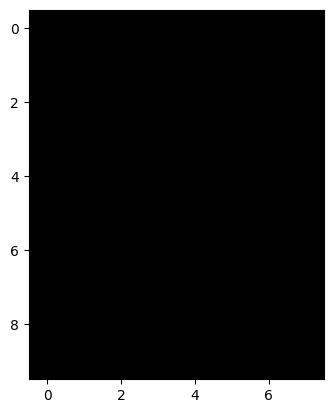

Pixel Shape: (10, 8)


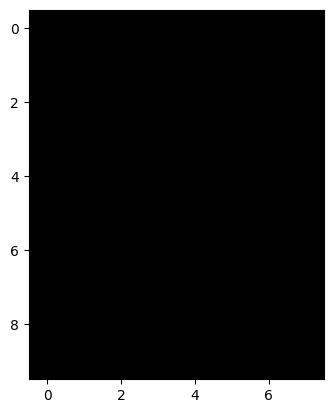

Pixel Shape: (10, 8)


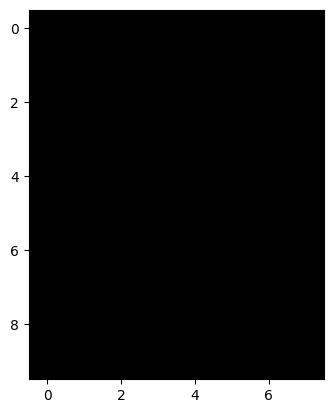

Pixel Shape: (10, 8)


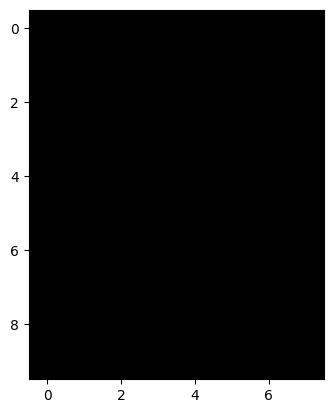

Pixel Shape: (10, 8)


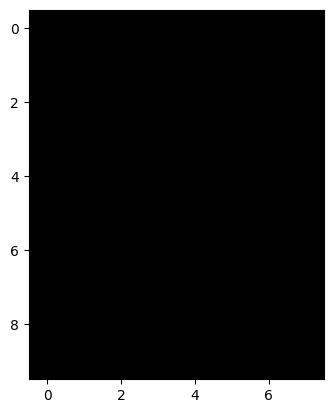

In [65]:
# Crop the image using the row and column pairs and display the cropped images and their pixel shapes
start_row, end_row = row_pairs[0]

all_images = []

for i in range(5):
    start_col, end_col = col_pairs[i]
    
    cropped_img = bw_img[start_row:end_row+1, start_col:end_col+1]

    # if cropped image is not 10x8 then resize it to 10x8
    if cropped_img.shape != (10, 8):
        cropped_img = cv2.resize(cropped_img, (8, 10), interpolation=cv2.INTER_NEAREST)
    #convert cropped image to binary (0 and 1)
    cropped_img = (cropped_img > 127).astype(int)
    all_images.append(cropped_img)

for image in all_images:
    print("Pixel Shape:", image.shape)
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.show()